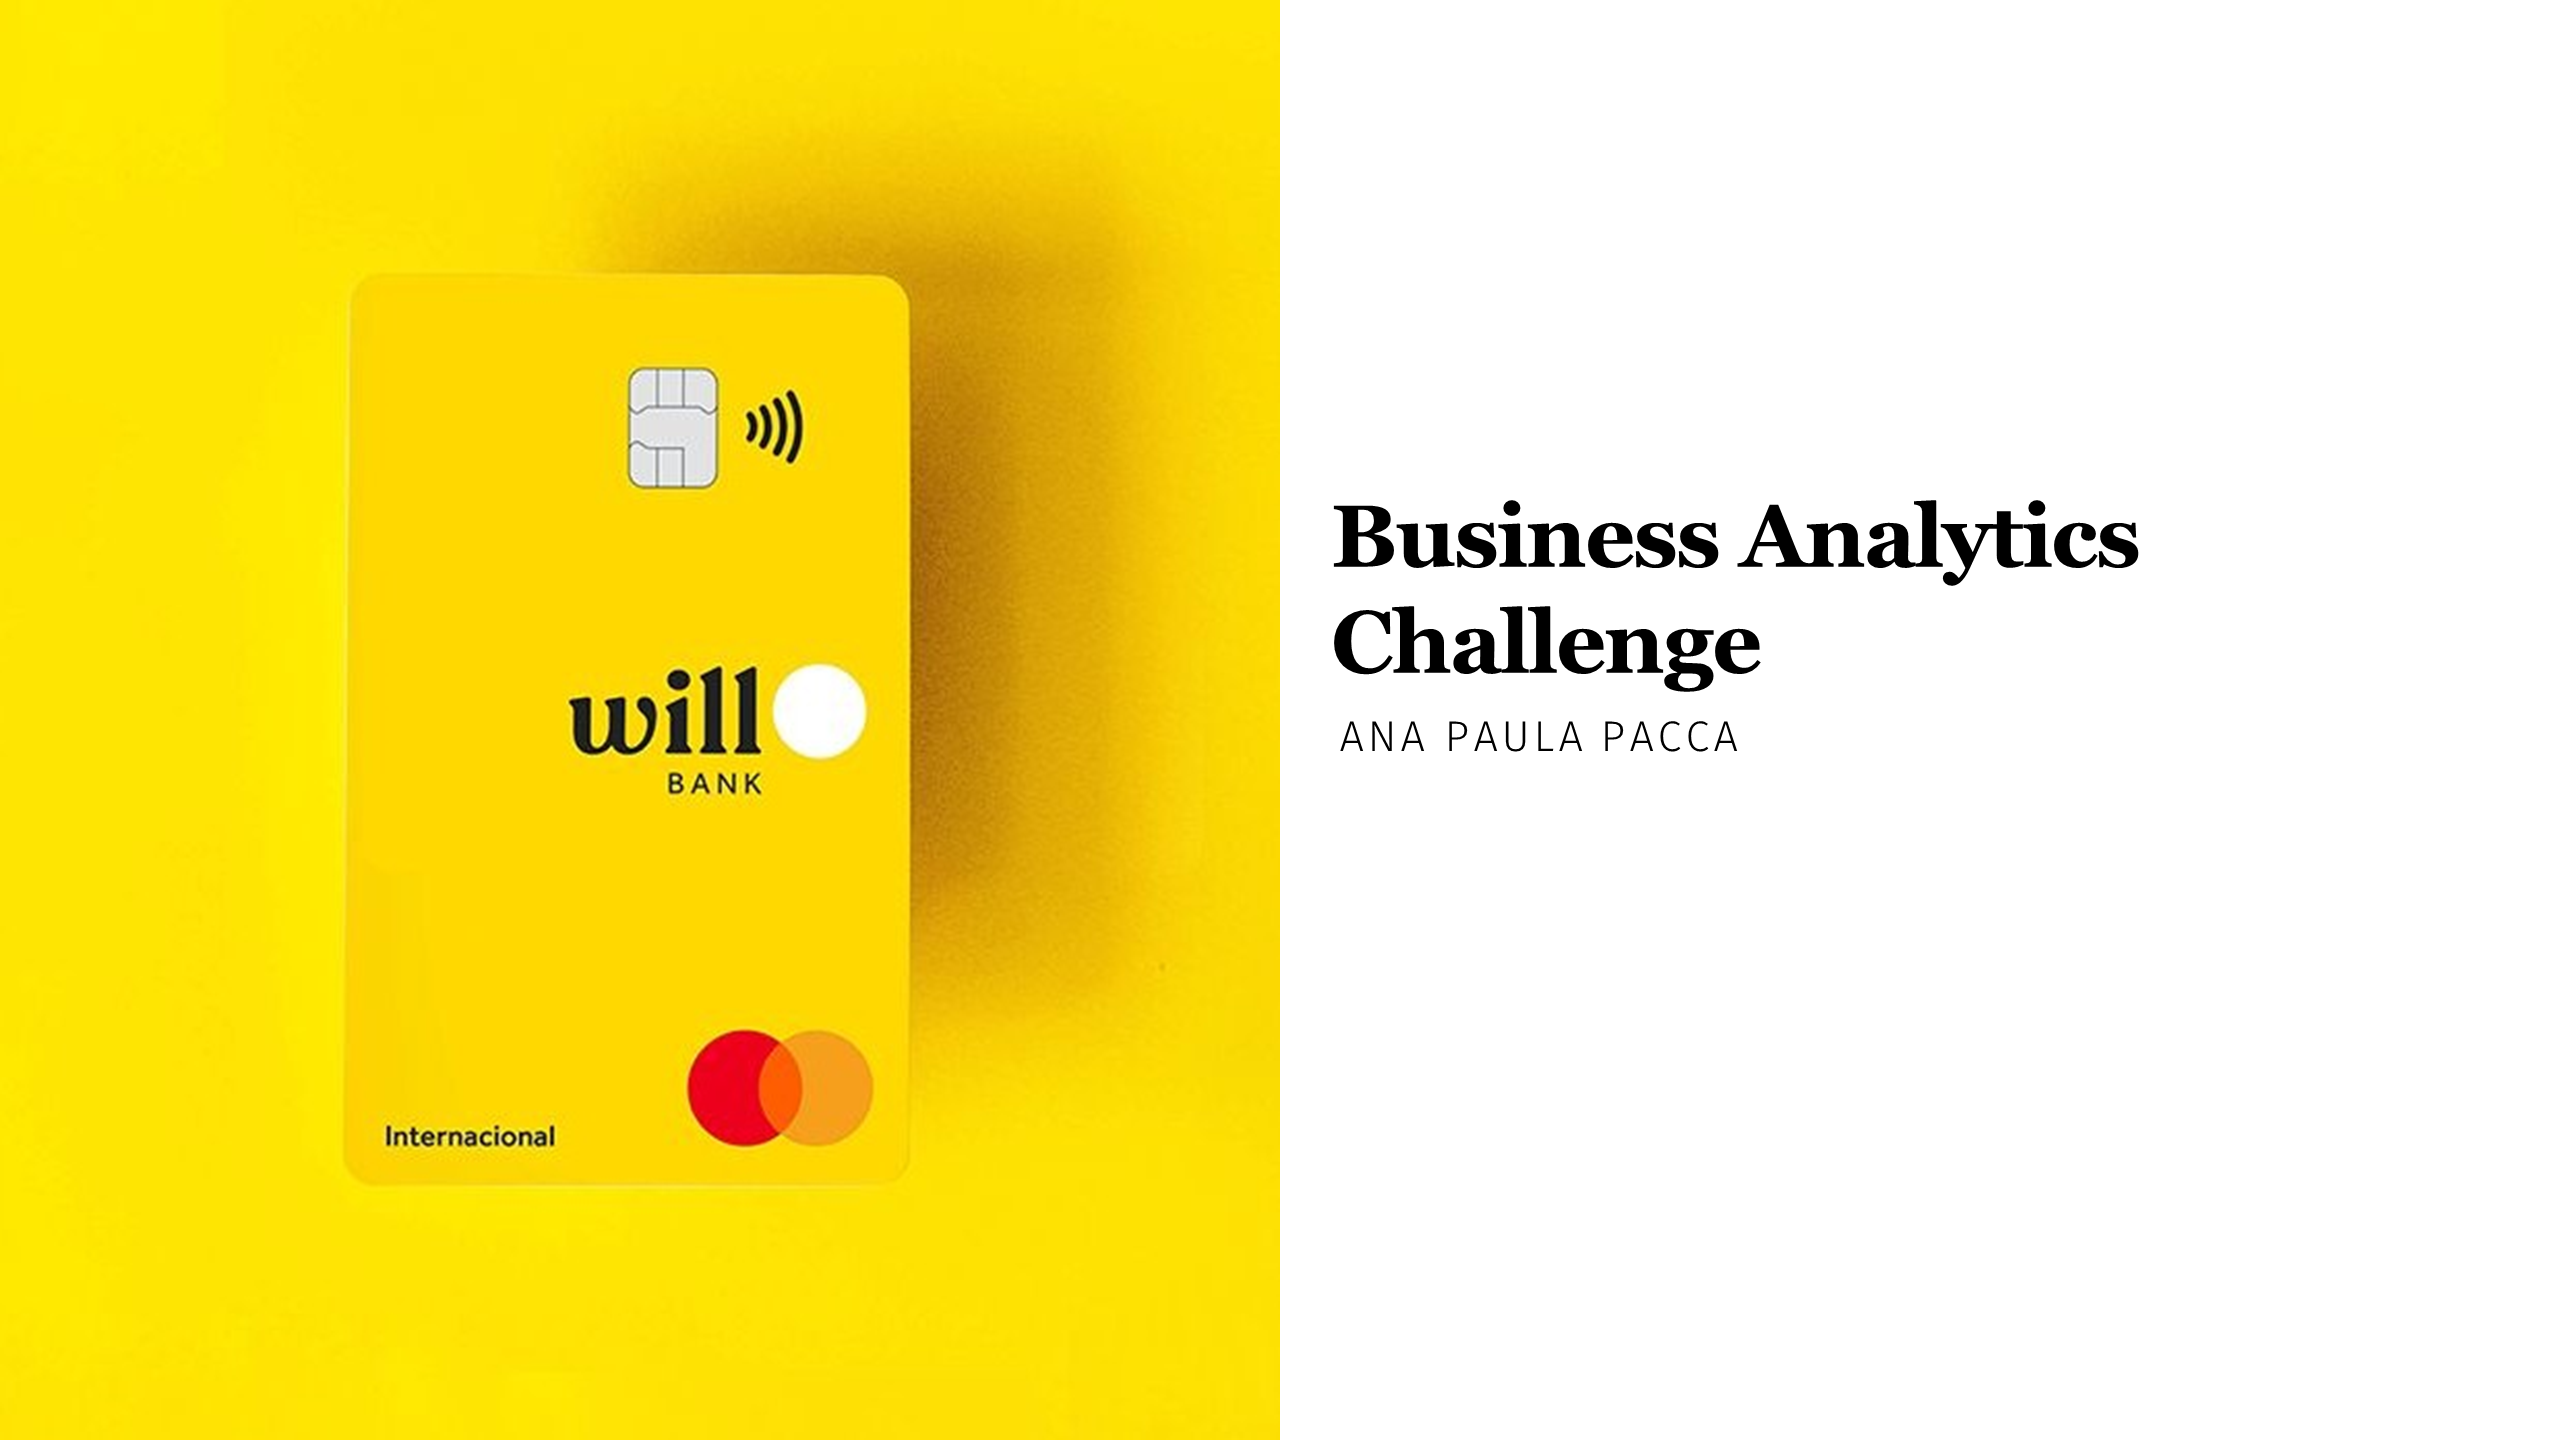

## Importar dataset

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/anapaccasilva/WillBank_case/main/Case_Bank_Customer.csv'
customers = pd.read_csv(url, sep= ",", index_col=0 )

# **EDA - Exploratory Data Analysis**

*A análise exploratória de dados é uma técnica de análise de dados que tem como objetivo examinar e resumir as principais características de um conjunto de dados, por meio de gráficos e medidas estatísticas simples, a fim de obter insights e identificar padrões iniciais.*

## 1) Panorama geral

In [14]:
customers.shape

(10000, 12)

In [15]:
customers.describe()   

,customer_id,credit_score,tenure,products_number,credit_card,active_member,age,balance,churn,estimated_salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,5.012800,1.530200,0.70550,0.515100,43.325600,73213.416956,0.214700,25185.030476
std,7.193619e+04,96.653299,2.892174,0.581654,0.45584,0.499797,33.622648,66207.038956,0.410635,52224.437410
min,1.556570e+07,350.000000,0.000000,1.000000,0.00000,0.000000,18.000000,-238387.560000,0.000000,0.000000
25%,1.562853e+07,584.000000,3.000000,1.000000,0.00000,0.000000,32.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,5.000000,1.000000,1.00000,1.000000,38.000000,95646.590000,0.000000,0.000000
75%,1.575323e+07,718.000000,7.000000,2.000000,1.00000,1.000000,44.000000,127072.217500,0.000000,0.000000
max,1.581569e+07,850.000000,10.000000,4.000000,1.00000,1.000000,298.000000,250898.090000,1.000000,199753.970000


In [16]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   products_number   10000 non-null  int64  
 4   credit_card       10000 non-null  int64  
 5   active_member     10000 non-null  int64  
 6   country           10000 non-null  object 
 7   age               10000 non-null  int64  
 8   gender            9480 non-null   object 
 9   balance           10000 non-null  float64
 10  churn             10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 1015.6+ KB


In [17]:
(customers.isnull() | 
 customers.empty    | 
 customers.isna()
 ).sum()

customer_id           0
credit_score          0
tenure                0
products_number       0
credit_card           0
active_member         0
country               0
age                   0
gender              520
balance               0
churn                 0
estimated_salary      0
dtype: int64

## 2) Comprensão das variáveis

```
Variáveis Categóricas
```

<style>
td {
  font-size: 50px
}
</style>

- country
- gender
- active_member
- churn
- credit card

**Barplot**

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [37]:
# função para criação do gráfico de barras
def barplot_count(dataframe, variavel, titulo):
  df = dataframe.groupby(variavel)[variavel].count().reset_index(name='count')
  total = df['count'].sum()
  df['percent'] = df['count'] / total * 100  # Calcula a quantidade relativa em porcentagem

  x = df[variavel]
  y = df['count']
  plt.figure(figsize=(10,8))

  #construir gráfico de barras usando cores aleatórias a cada execução
  cor = ['#FFD900', '#414141', '#CACACA']
  colors = cor[random.randint(0,1)]  #color aleatoria
  bars = plt.bar(x,y, color = cor[:len(x)])

  #adiciona titulo ao gráfico, aos eixos e salva a figura
  plt.title(titulo)
  plt.xlabel(variavel)
  plt.ylabel('quantidade')
  plt.savefig(titulo + '.png', bbox_inches="tight")

  #função para adicionar rótulos às colunas
  def addlabels(x, y):
    for i in range(len(x)):
      label = f'{y[i]}  ({df["percent"][i]:.2f}%)'
      plt.text(i, y[i], label, ha='center', va='bottom')
  addlabels(x, y)
  return plt.show()

▶ Country



In [21]:
customers.country.value_counts()

France     5014
Spain      2477
Germany    1403
German      820
Grmany      286
Name: country, dtype: int64

Padronizar a grafia do país "Germany"

In [2]:
customers = customers.replace(['German','Grmany'], 'Germany')

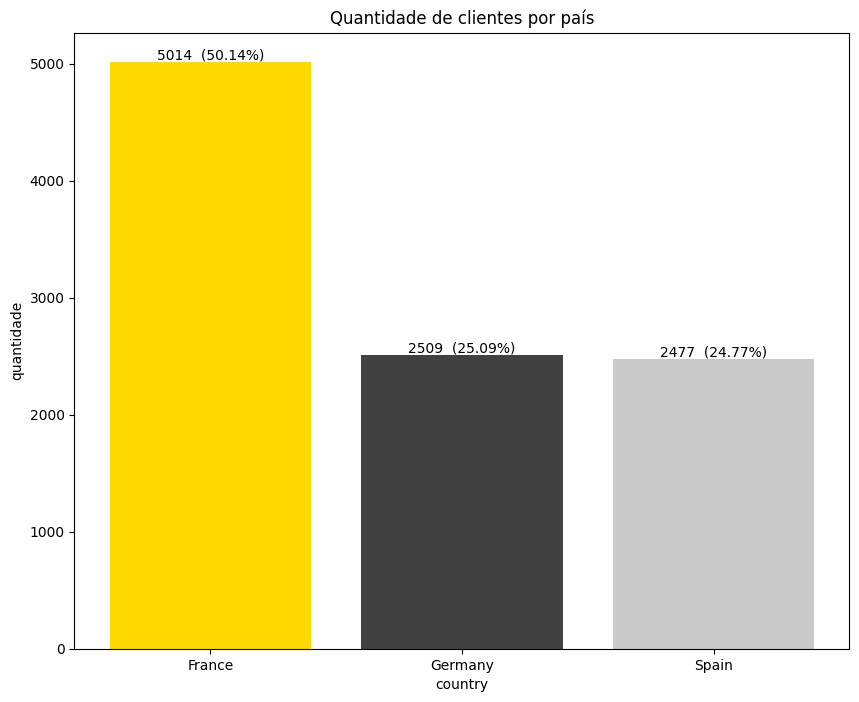

In [38]:
barplot_count(customers, 'country', 'Quantidade de clientes por país')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A coluna 'country' apresenta 100% dos valores preenchidos, porém com algumas variações da palavra "Germany". Após a normalização desse dado, foi possível observar que 50% dos clientes têm como país de residência a França enquanto os demais esão praticamente igualmente distribuídos entre Espanha e Alemanha.*

In [65]:
customers.gender.fillna('Null').value_counts()

Male      5167
Female    4313
Null       520
Name: gender, dtype: int64

▶ Gender



Substituir Valores Nulos por "Não Informado"

In [3]:
customers['gender'] = customers['gender'].fillna('Não Informado')

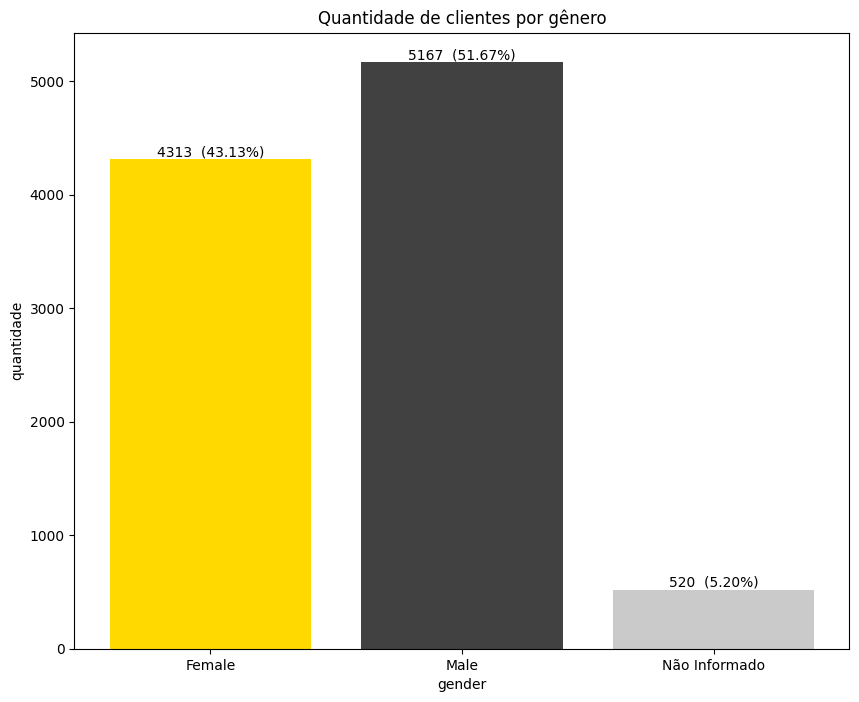

In [41]:
barplot_count(customers, 'gender', 'Quantidade de clientes por gênero')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A coluna 'gender' representa o sexo de cada cliente e conta com 95% dos valores preenchidos. Os demais 5% de valores nulos, para fins de análise e consistência, foram tomados como "não informados" e assim figuram no gráfico gerado. Foi observado que 52% dos clientes são do sexo masculino, 43% são do sexo feminino e 5% não informaram o sexo.*

▶ active_member



In [4]:
customers['active_member'] = customers['active_member'].replace({0: 'Inativo', 1: 'Ativo'})

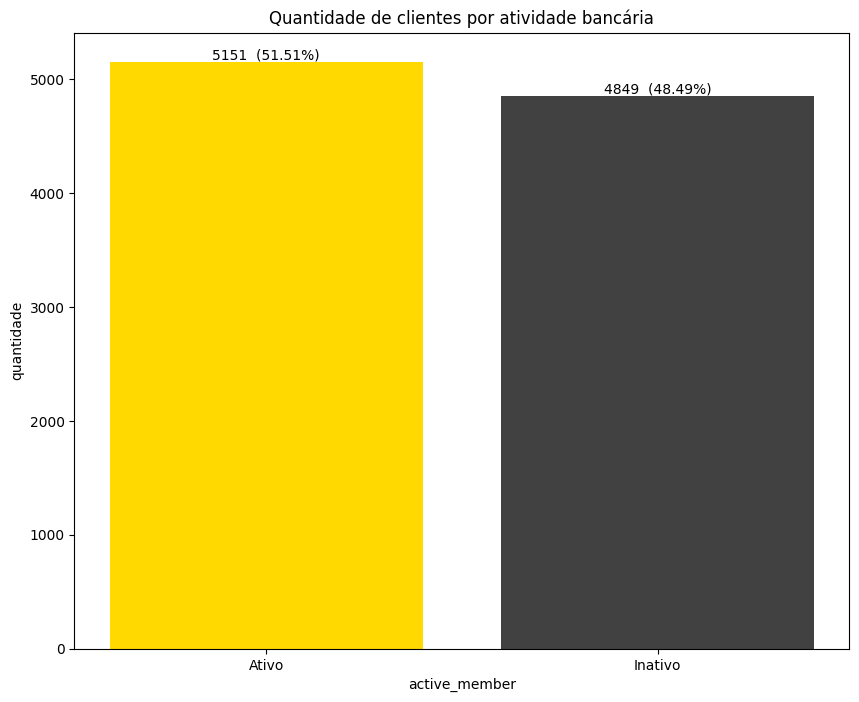

In [45]:
barplot_count(customers, 'active_member', 'Quantidade de clientes por atividade bancária')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A coluna 'active member' indica o status do cliente (se ativo ou não) e possui 100% dos valores preenchidos. Através da visualização gerada, foi possível observar que 51% dos clientes estão ativos enquanto 49% estão inativos.*

▶ churn



In [5]:
customers['churn'] = customers['churn'].replace({0: 'Não', 1: 'Sim'})

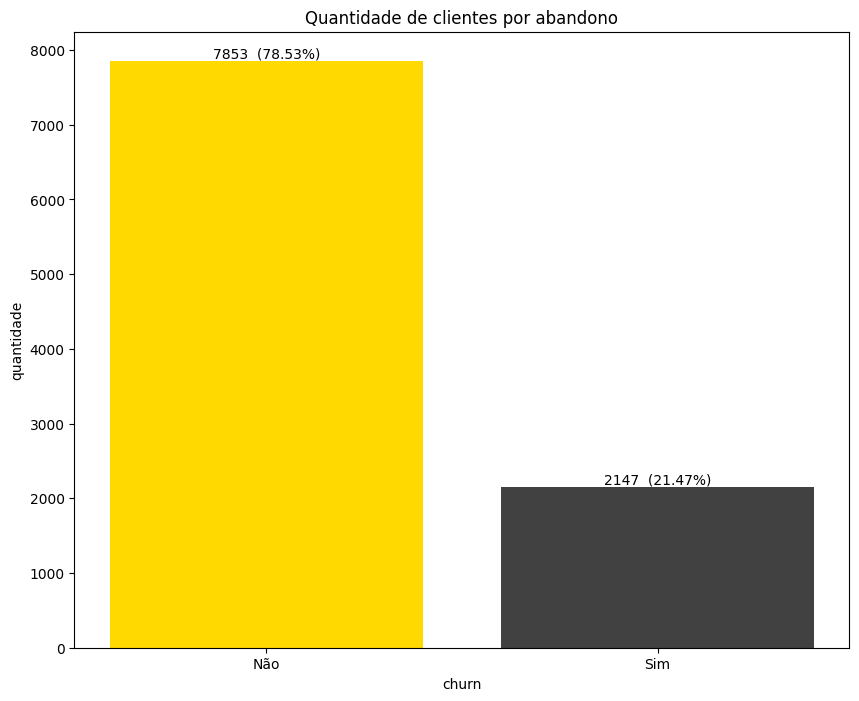

In [47]:
barplot_count(customers, 'churn', 'Quantidade de clientes por abandono')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *O 'churn' representa se o cliente abandonou ou não ou serviço e possui 100% dos valores preenchidos. Através da visualização gerada, foi possível observar que 78% dos clientes não abandonaram os serviços, enquanto 22% abandonaram.*

▶ credit_card



In [6]:
customers['credit_card'] = customers['credit_card'].replace({0: 'Não', 1: 'Sim'})

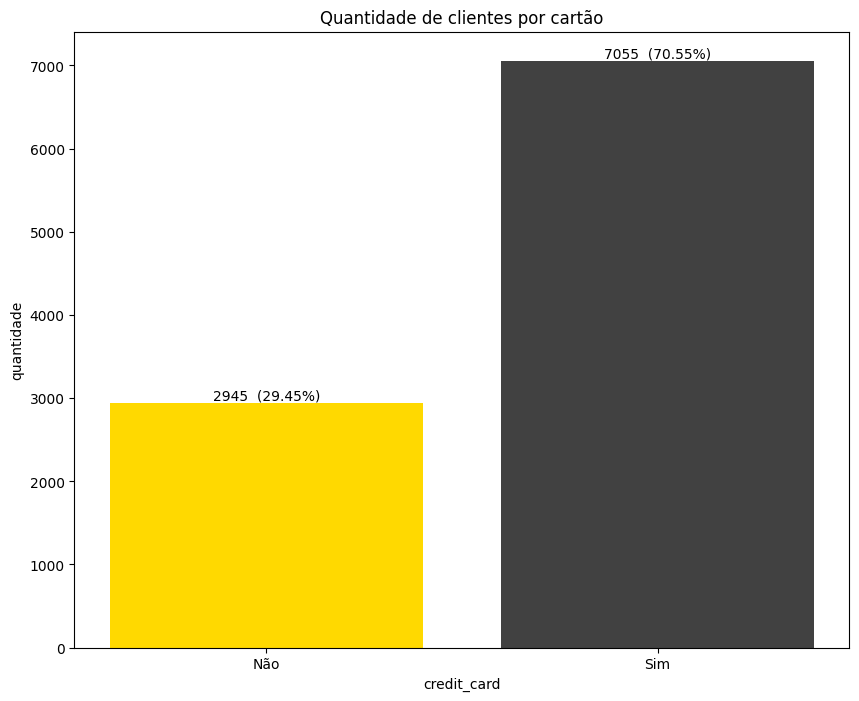

In [49]:
barplot_count(customers, 'credit_card', 'Quantidade de clientes por cartão')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A coluna 'credit_card' indica se o cliente possui ou não cartão de crédito e possui 100% dos valores preenchidos. Foi possível observar que 71% dos clientes possuem cartão de crédito enquanto 29% dos clientes não possuem.*

```
Variáveis Numéricas
```

- credit_score
- age
- tenure
- balance
- products_number
- estimated_salary



**Histogram function**

In [74]:
# função para criação do histograma

def histograma1(dataframe, variavel, titulo):
  plt.figure(figsize=((10,8)))
  cor = ['#FFD900', '#414141', '#CACACA']
  colors = cor[random.randint(0,2)]  #cor aleatoria
  plt.hist(dataframe[variavel], edgecolor='white', color = colors)
  
 #adiciona título ao gráfico, título aos eixos e salva a figura
  plt.title(titulo)
  plt.savefig(titulo + '.png', bbox_inches="tight")
  plt.show()

In [52]:
# função para criação do histograma

def histograma2(dataframe, variavel, titulo):
  plt.figure(figsize=((10,8)))

  df = dataframe.groupby(variavel)[variavel].count().reset_index(name='count')
  x = df[variavel]
  y = df['count']
  cor = ['#FFD900', '#414141', '#CACACA']
  colors = cor[random.randint(0,2)]  #cor aleatoria
  bars = plt.bar(x,y, color = colors)
  
 #adiciona título ao gráfico, título aos eixos e salva a figura
  plt.title(titulo)
  plt.savefig(titulo + '.png', bbox_inches="tight")
  plt.show()


<font color='4A4A4A'> *Para entender as variáveis numéricas, alguns histogramas são apresentados a seguir, representando a distribuição dos dados e, quando necessário, análise de estatística descritiva.*

▶ credit_score


In [34]:
customers.credit_score.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

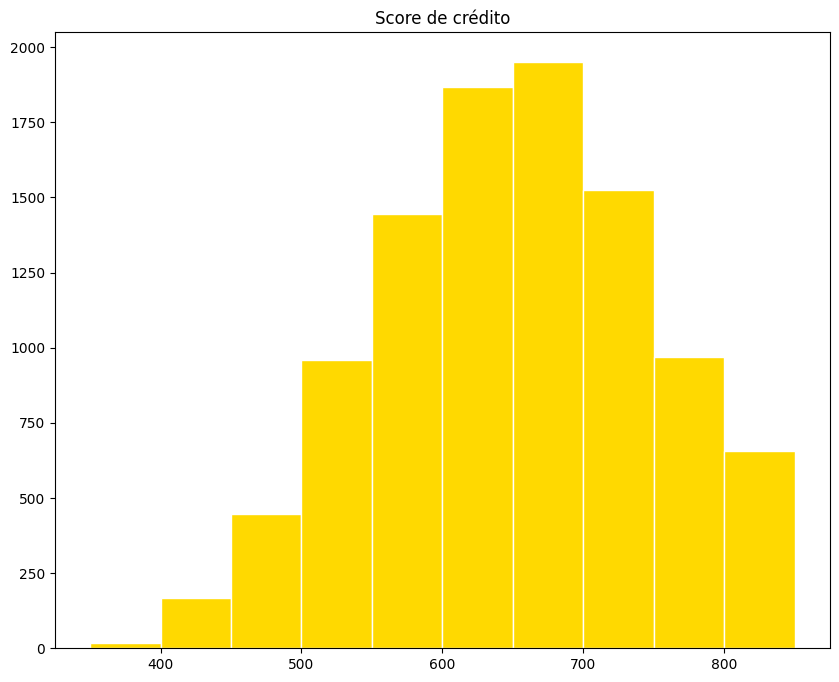

In [53]:
histograma1(customers, "credit_score", "Score de crédito")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A variável 'credit_score' representa o score de crédito de cada cliente, numa escala de 0 a 1000, possuindo 100% dos valores preenchidos.*

▶ age


In [36]:
customers.age.describe()

count    10000.000000
mean        43.325600
std         33.622648
min         18.000000
25%         32.000000
50%         38.000000
75%         44.000000
max        298.000000
Name: age, dtype: float64

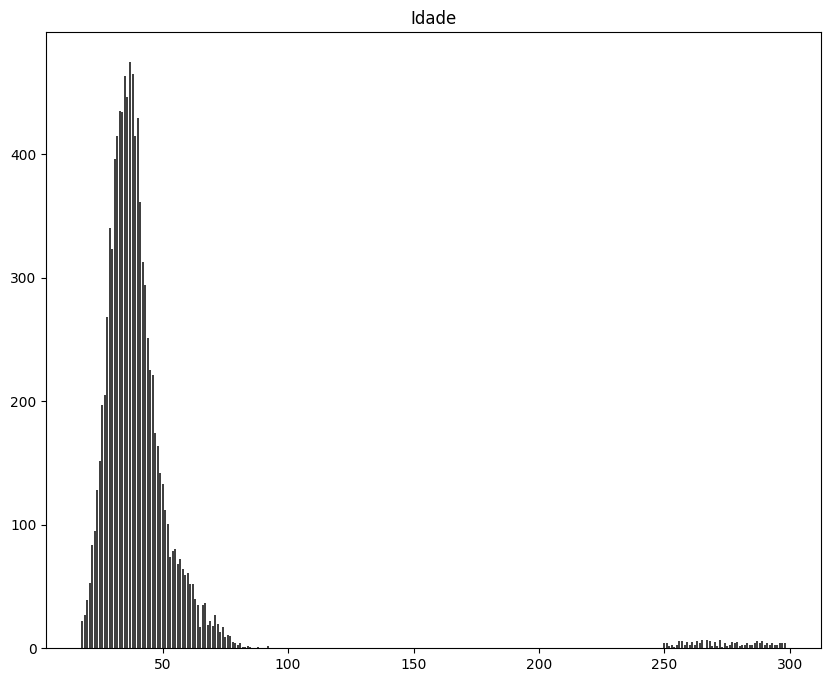

In [54]:
histograma2(customers, "age", "Idade")

In [61]:
customers2 = customers[customers['age'] < 100] 

In [62]:
customers2.age.describe()

count    9812.000000
mean       38.907460
std        10.488477
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: age, dtype: float64

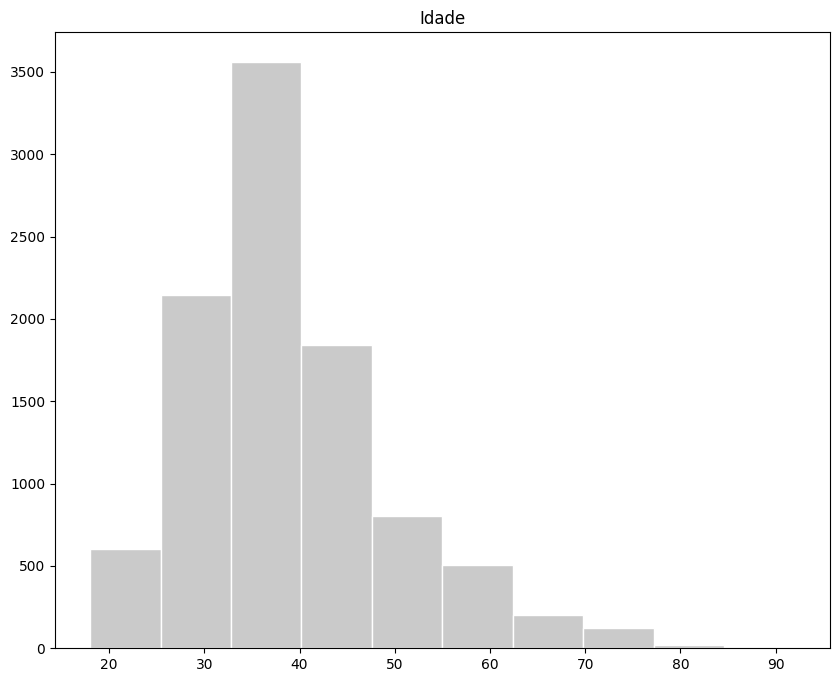

In [75]:
histograma1(customers2, "age", "Idade")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A variável 'age' representa a idade do cliente no momento da extração da base e possui 100% dos valores preenchidos, porém com alguns valores discrepantes (idade superior a 250 anos). Desconsiderando os valores discrepantes, observa-se uma média de idade de 39 anos.*

▶ tenure


In [71]:
customers.tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

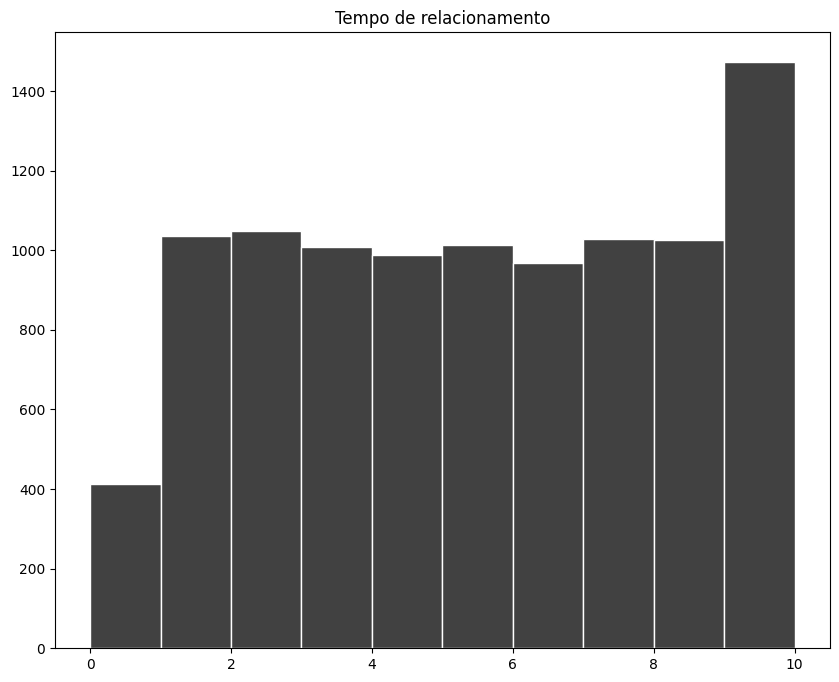

In [78]:
histograma1(customers, "tenure", "Tempo de relacionamento")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A variável 'tenure' representa o tempo (em anos) de relacionamento do cliente com a empresa, calculado no momento da extração da base e possui 100% dos valores preenchidos. Observa-se que os cliente da amostra têm, em média, 5 anos de relacionamento.*

▶ balance


In [79]:
customers.balance.describe()

count     10000.000000
mean      73213.416956
std       66207.038956
min     -238387.560000
25%           0.000000
50%       95646.590000
75%      127072.217500
max      250898.090000
Name: balance, dtype: float64

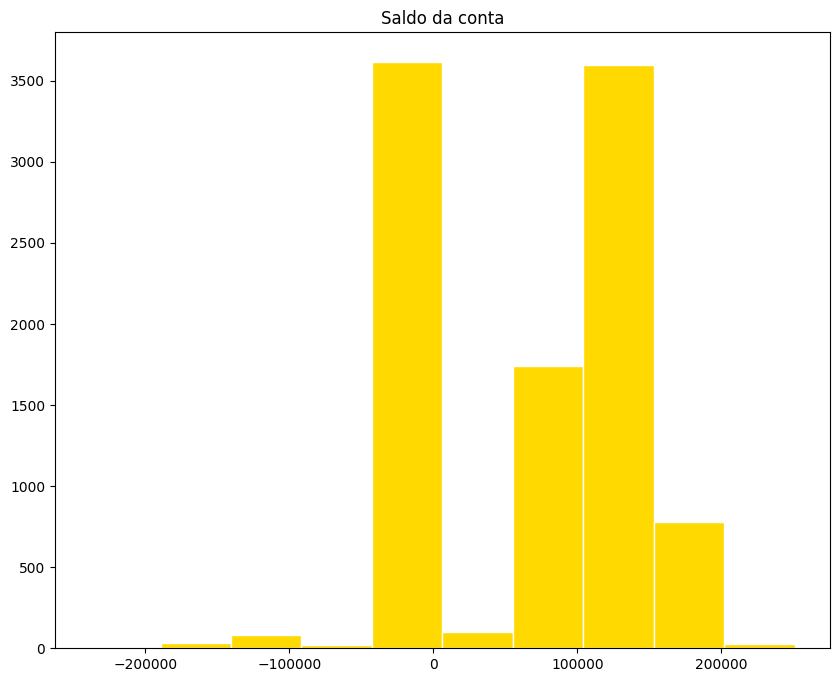

In [80]:
histograma1(customers, "balance", "Saldo da conta")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A variável 'balance' representa o saldo da conta do cliente no momento da extração da base. Apesar de possuir 100% dos valores preenchidos, existe uma grande ocorrência do valor 0. É necessário entender se esse valor corresponde ao saldo real das contas ou se foi apenas utilizado como um valor default para valores nulos.*

▶ products_number


In [48]:
customers.products_number.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products_number, dtype: float64

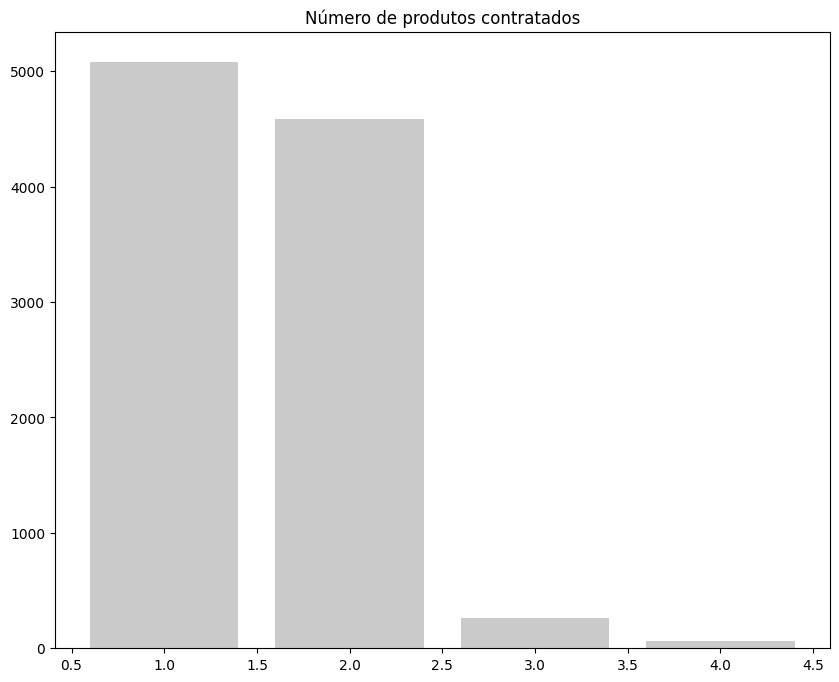

In [87]:
histograma2(customers, "products_number", "Número de produtos contratados")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A variável 'products_number' representa o número de produtos contratados, sendo no mínimo 1, e possui 100% dos valores preenchidos. Considerando a mediana, é possível observar que os clientes têm em torno de 1 produto contratado.*

▶ estimated_salary


In [50]:
customers.estimated_salary.describe()

count     10000.000000
mean      25185.030476
std       52224.437410
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      199753.970000
Name: estimated_salary, dtype: float64

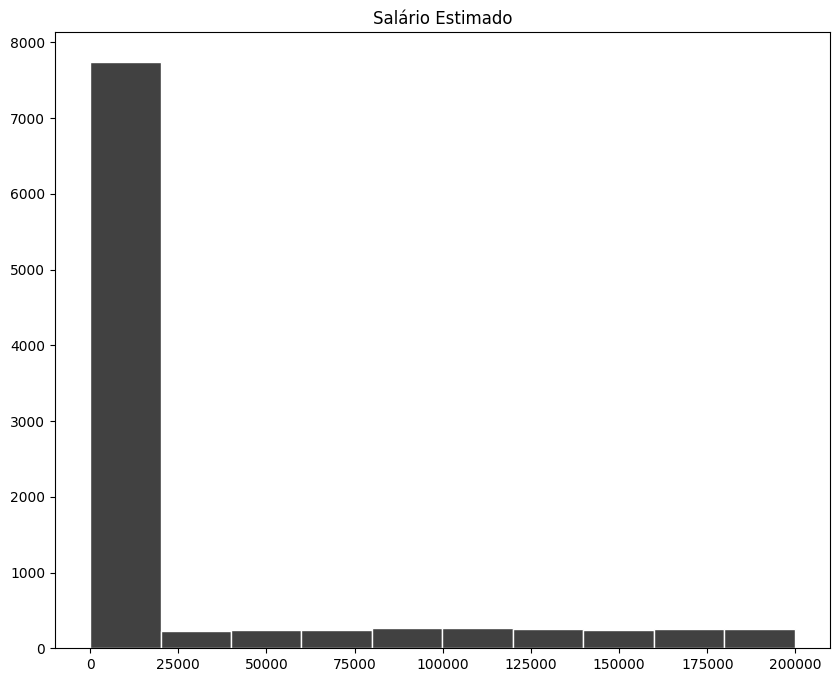

In [88]:
histograma1(customers, "estimated_salary", "Salário Estimado")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *A variável 'estimated_salary' representa o salário estimado do cliente e apesar de possuir 100% dos valores preenchidos, assim como a variável "balance", apresenta uma grande ocorrência do valor 0, e, por isso, merece as mesmas considerações.*

## 3) Análise Bivariante

<font color='4A4A4A'> *Finalmente, para entender como as variáveis numéricas se relacionam, foram construídos boxplots e outros gráficos para análise bivariante de variáveis que indicaram ter algum nível de correlação com a variável dependente (churn).* 

**Boxplot function**

In [89]:
import seaborn as sns

In [96]:
#cria a função para construção do boxplot
def boxplot(dataframe, X, Y, titulo):
  #seleciona uma cor aleatoriamente entre a lista de cores aceitáveis para esse tipo de gráfico
  sns.catplot(x=X, y=Y, data=dataframe, kind="box", aspect=1.5, palette=['#FFD900', '#414141'])
  sns.set(style="darkgrid")
  #adiciona um título ao gráfico, título aos eixos e salva a figura
  plt.title(titulo)
  plt.savefig(titulo + '.png', bbox_inches="tight")
  # Remover o grid
  plt.grid(False)

  # Remover a cor de fundo
  plt.gca().set_facecolor('white')
  
  plt.show()

▶ Abandono x Score de Crédito

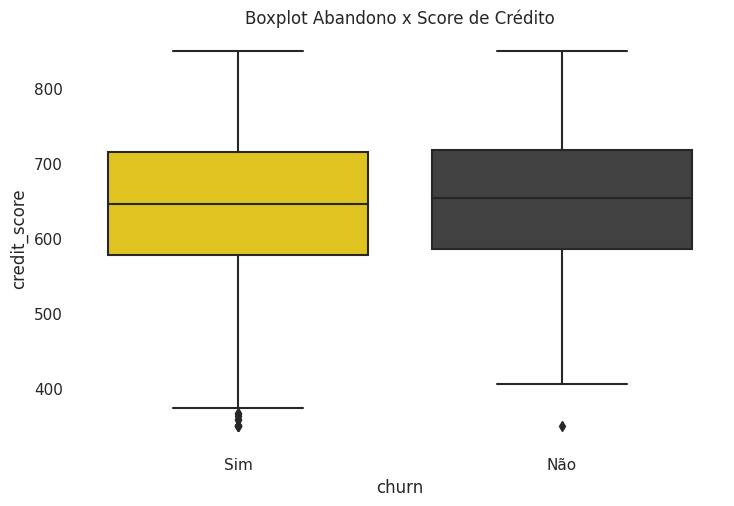

In [97]:
boxplot(customers, "churn", "credit_score", "Boxplot Abandono x Score de Crédito")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Analisando o boxplot obtido, nota-se que pouca diferença na distribuição do score de crédito entre os clientes classificados como abandono e os que não foram classificados, com uma mediana muito próxima entre os dois grupos e poucos outliers.*

▶ Abandono x Idade

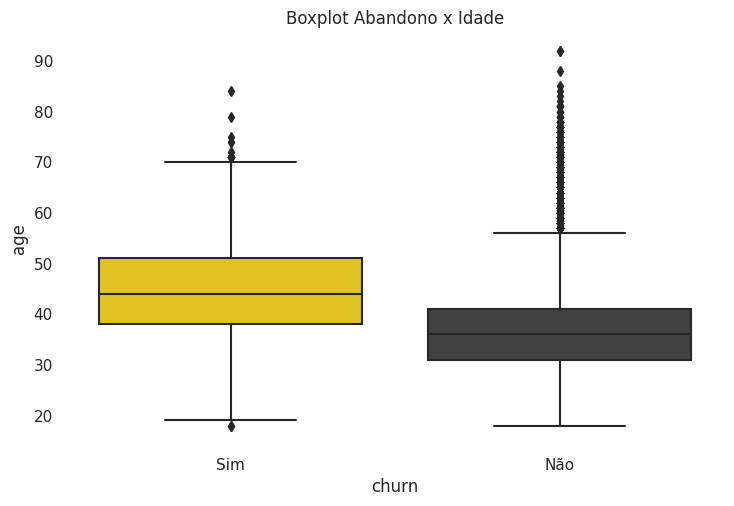

In [99]:
boxplot(customers2, "churn", "age", "Boxplot Abandono x Idade")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Para a análise dessas duas variáveis, foram desconsiderados os valores discrepantes apontados anteriormente e o que se observou foi que os clientes identificados como abandono possuem mediana de idade superior a dos clientes que não abandonaram (em torno de 45 anos), bem como a concentração da maior parte dos valores.*

▶ Abandono x Saldo

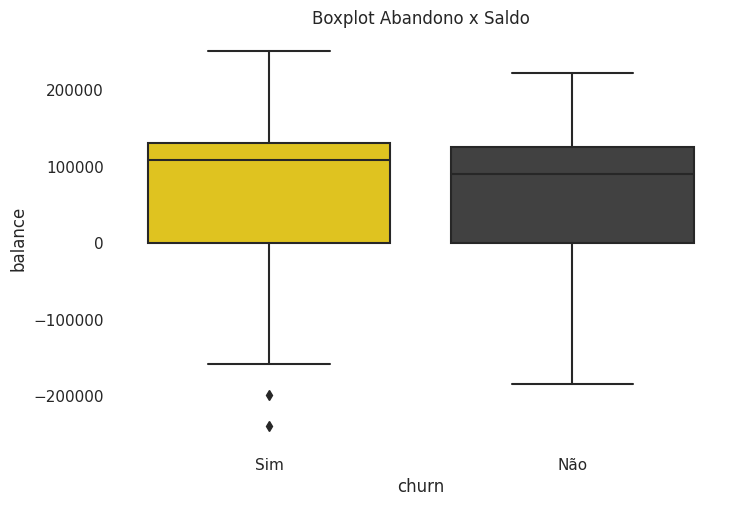

In [102]:
boxplot(customers, "churn", "balance", "Boxplot Abandono x Saldo")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Para a análise dessas duas variáveis, foram desconsiderados os valores discrepantes apontados anteriormente e o que se observou foi que os clientes identificados como abandono possuem mediana de idade superior a dos clientes que não abandonaram (em torno de 45 anos), bem como a concentração da maior parte dos valores.*

▶ Abandono x Numero de Produtos

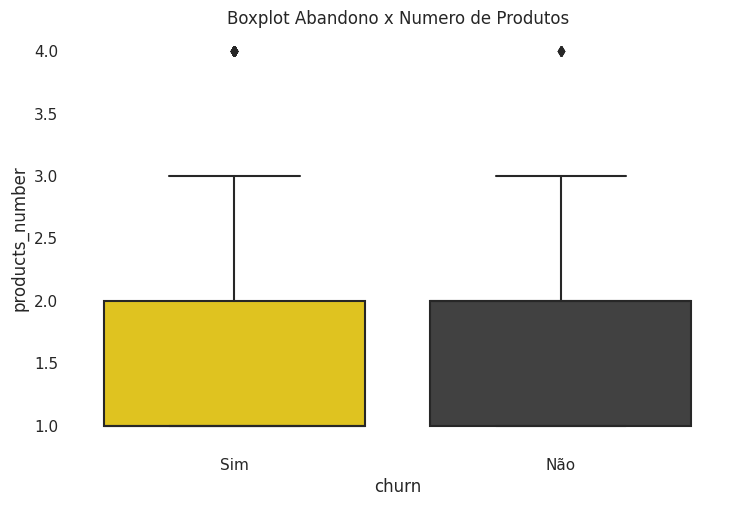

In [101]:
boxplot(customers, "churn", "products_number", "Boxplot Abandono x Numero de Produtos")


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Com relação ao número de produtos contratados, não se notou uma diferença significativa entre os grupos que abandonaram ou não os serviços.*

**Stacked Bar function**

In [7]:
import seaborn as sns

In [8]:
#cria a função para construção do gráfico relativo empilhado
def stacked_bar(dataframe, X, Y, titulo):
  cross_tab = pd.crosstab(index=dataframe[Y],
                        columns=dataframe[X])
  cross_tab_prop = pd.DataFrame(dataframe.groupby(Y)[X].value_counts(normalize=True).unstack(X))

  #seleciona uma cor aleatoriamente entre a lista de cores aceitáveis para esse tipo de gráfico
  cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=['#FFD900', '#414141'], 
                    figsize=(10, 6))

  plt.legend(loc="lower left", ncol=2)
  plt.xlabel(Y)
  plt.ylabel(X)
  plt.title(titulo)
  # Remover o grid
  plt.grid(False)

  # Remover a cor de fundo
  plt.gca().set_facecolor('white')


  for n, x in enumerate([*cross_tab.index.values]):
      for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
          plt.text(x=n - 0.10,
                   y=y_loc,
                   s=f'{np.round(proportion * 100, 2)}%', 
                   color='black',
                   bbox={'facecolor': 'white', 'alpha': 0.8},
                   fontsize=8)
          plt.gca().set_axis_off()


  plt.show()

▶ Abandono x Gênero

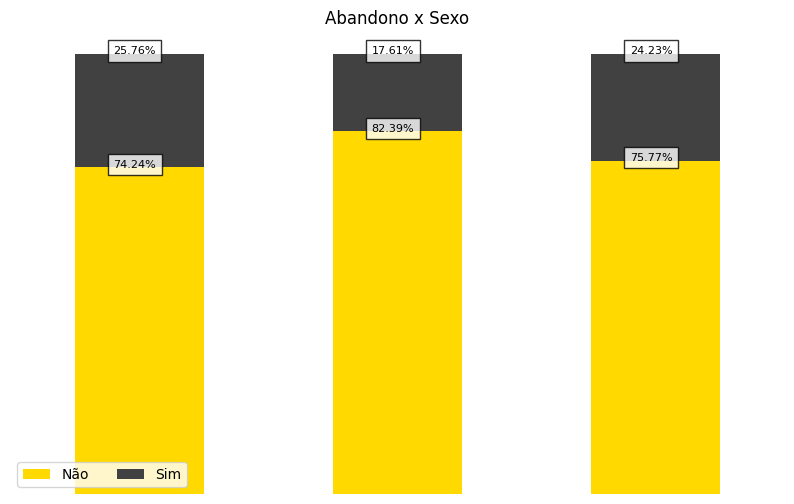

In [11]:
stacked_bar(customers, 'churn', 'gender', 'Abandono x Sexo')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Analisando os valores relativos, observou-se que entre os clientes do sexo feminino a taxa de abandono foi maior, seguido pelos clientes que não informaram o sexo e, por fim, clientes do sexo masculino tiveram a menor taxa de abandono.*

▶ Abandono x País de Residência

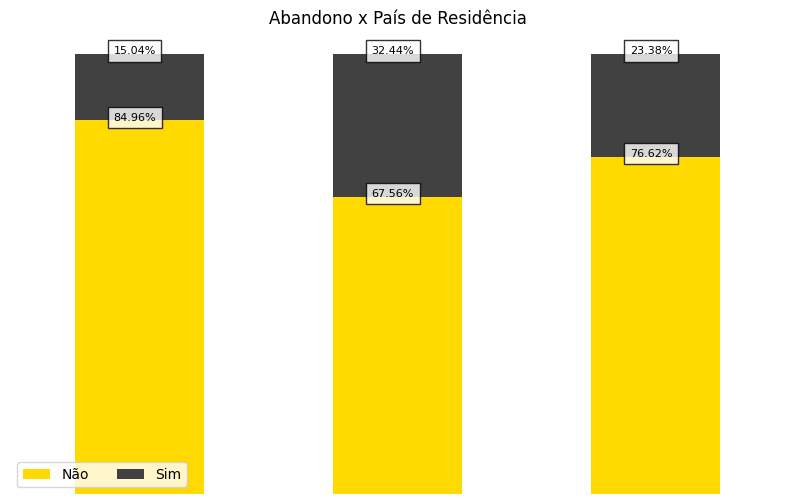

In [12]:
stacked_bar(customers, 'churn', 'country', 'Abandono x País de Residência')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Analisando os valores relativos, nota-se que clientes cujo país de residência é a Alemanha têm maior taxa de abandono (32%), seguido pelos clientes de origem espanhola (23%) e, por fim, clientes da França com 15% de taxa de abandono.*

▶ Abandono x Posse Cartão de crédito

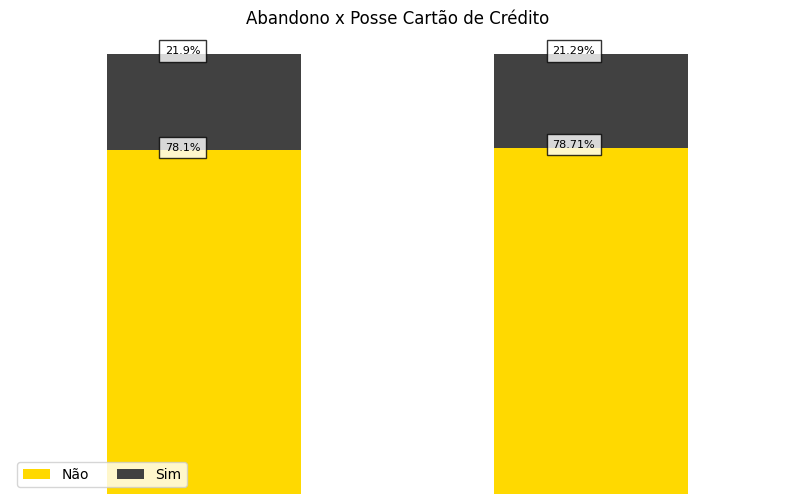

In [13]:
stacked_bar(customers, 'churn', 'credit_card', 'Abandono x Posse Cartão de Crédito')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Analisando os valores relativos é possível identificar que não existe uma diferença significativa da taxa de abandono entre os clientes que possuem ou não cartão de crédito.*

▶ Abandono x Qtd Produtos Contratados

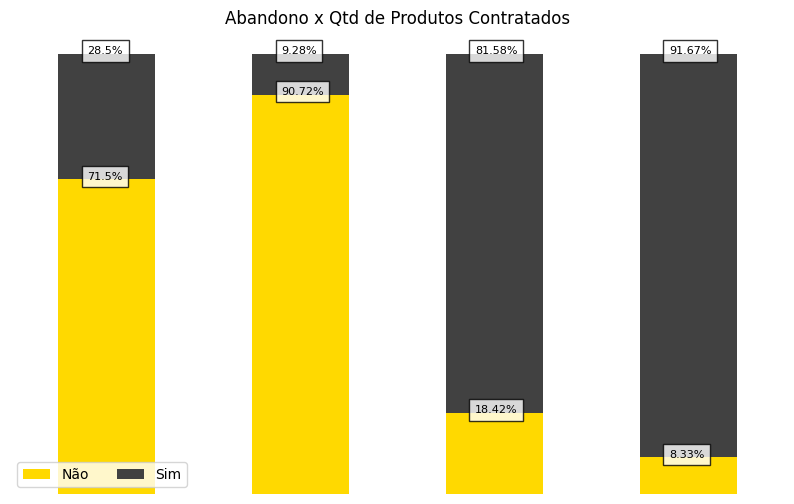

In [15]:
stacked_bar(customers, 'churn', 'products_number', 'Abandono x Qtd de Produtos Contratados')


<font face="Biome" size=5 color='#FFD900' > Análise <font>

---



<font color='4A4A4A'> *Analisando os valores relativo, destaca-se a alta taxa de abandono (92%) entre clientes que contrataram 4 produtos, 82% entre os que contrataram 3 produtos, 29% entre os que contrataram 1 produto e 9% entre os que contrataram 2 produtos*